<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment06** #

Name : 이현주

Student # : 20184060

# **1. Plot the training data [2pt]**

- plot the training data points (x,y) with their labels / in colors (blue for label 0 and red for label 1)

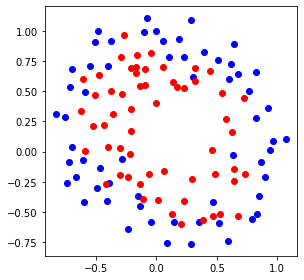

In [105]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.animation as animation
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_regression 
import csv
import math
# from google.colab import files

# uploaded = files.upload()

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# **2. Write down the high dimensional function g(x,y;θ) [2pt]**

- write down the equation for the non-linear function g(x,y;θ) used for the classifier in LaTeX format

$$
g(x, y; \theta) = \theta_0f_0(x, y) + \theta_1f_1(x, y) + ⋯ + \theta_{k-1}f_{k-1}(x, y)\\
$$


$$
g(x, y; \theta) = \theta_0 + \theta_1x + \theta_2y + \theta_3x^2 + \theta_4xy + \theta_5y^2 + \theta_6x^3 + \theta_7x^2y + \theta_8xy^2 + \theta_9y^3 + \theta_{10}x^4 + \theta_{11}x^3y + \theta_{12}x^2y^2 + \theta_{13}xy^3 + \theta_{14}y^4
$$

# **3. Plot the training error [3pt]**

- plot the training error J(θ) at every iteration of gradient descent until convergence (in blue color)

In [106]:
X = pointX #전체 x
y = np.array(pointY,dtype=float)
label = np.array(label,dtype=float)
print(len(y))

118


In [0]:
def g_function(X, y, theta, it, i):
  return  (theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i] + theta[3][it]*X[i]*X[i] +
          theta[4][it]*X[i]*y[i] + theta[5][it]*y[i]*y[i] + theta[6][it]*X[i]*X[i]*X[i] + theta[7][it]*X[i]*X[i]*y[i] +
          theta[8][it]*X[i]*y[i]*y[i] + theta[9][it]*y[i]*y[i]*y[i] + theta[10][it]*X[i]*X[i]*X[i]*X[i] + theta[11][it]*X[i]*X[i]*X[i]*y[i] +
          theta[12][it]*X[i]*X[i]*y[i]*y[i] + theta[13][it]*X[i]*y[i]*y[i]*y[i] + theta[14][it]*y[i]*y[i]*y[i]*y[i] 
          #  + theta[15][it]*X[i]*X[i]*X[i]*X[i]*X[i]
           )

In [0]:
def gradient_descent(X,y,label,theta,learning_rate=0.001,iterations=30000):
    
    m = len(y)

    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,15))
    for it in range(iterations):
        pred = 0

        pred0 = 0
        pred1 = 0
        pred2 = 0
        pred3 = 0
        pred4 = 0
        pred5 = 0
        pred6 = 0
        pred7 = 0
        pred8 = 0
        pred9 = 0
        pred10 = 0
        pred11 = 0
        pred12 = 0
        pred13 = 0
        pred14 = 0
        # pred15 = 0

        for i in range(0, m):
          # print(i)
          #cost 함수
          pred = pred + ((-1)*label[i]*math.log(1/(1 + math.exp((-1)*g_function(X, y, theta, it, i))))-((1-label[i])*math.log(1 - (-1)*(1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))))))
          
          #  σ(z)   =    (1/(1 + math.exp((-1)*(theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i]))))

          #theta함수
          pred0 = pred0 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])
          pred1 = pred1 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]
          pred2 = pred2 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*y[i]
          pred3 = pred3 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]
          pred4 = pred4 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*y[i]
          pred5 = pred5 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*y[i]*y[i]
          pred6 = pred6 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]*X[i]
          pred7 = pred7 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]*y[i]
          pred8 = pred8 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*y[i]*y[i]
          pred9 = pred9 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*y[i]*y[i]*y[i]
          pred10 = pred10 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]*X[i]*X[i]
          pred11 = pred11 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]*X[i]*y[i]
          pred12 = pred12 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]*y[i]*y[i]
          pred13 = pred13 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*y[i]*y[i]*y[i]
          pred14 = pred14 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*y[i]*y[i]*y[i]*y[i]
          # pred15 = pred15 + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*X[i]*X[i]*X[i]*X[i]*X[i]
        
        theta[0][it + 1] = theta[0][it] - (1/m)*learning_rate*pred0
        theta[1][it + 1] = theta[1][it] - (1/m)*learning_rate*pred1
        theta[2][it + 1] = theta[2][it] - (1/m)*learning_rate*pred2
        theta[3][it + 1] = theta[3][it] - (1/m)*learning_rate*pred3
        theta[4][it + 1] = theta[4][it] - (1/m)*learning_rate*pred4
        theta[5][it + 1] = theta[5][it] - (1/m)*learning_rate*pred5
        theta[6][it + 1] = theta[6][it] - (1/m)*learning_rate*pred6
        theta[7][it + 1] = theta[7][it] - (1/m)*learning_rate*pred7
        theta[8][it + 1] = theta[8][it] - (1/m)*learning_rate*pred8
        theta[9][it + 1] = theta[9][it] - (1/m)*learning_rate*pred9
        theta[10][it + 1] = theta[10][it] - (1/m)*learning_rate*pred10
        theta[11][it + 1] = theta[11][it] - (1/m)*learning_rate*pred11
        theta[12][it + 1] = theta[12][it] - (1/m)*learning_rate*pred12
        theta[13][it + 1] = theta[13][it] - (1/m)*learning_rate*pred13
        theta[14][it + 1] = theta[14][it] - (1/m)*learning_rate*pred14
        # theta[15][it + 1] = theta[15][it] - (1/m)*learning_rate*pred15

        theta_history[it][0] = theta[0][it]
        theta_history[it][1] = theta[1][it]
        theta_history[it][2] = theta[2][it]
        theta_history[it][3] = theta[3][it]
        theta_history[it][4] = theta[4][it]
        theta_history[it][5] = theta[5][it]
        theta_history[it][6] = theta[6][it]
        theta_history[it][7] = theta[7][it]
        theta_history[it][8] = theta[8][it]
        theta_history[it][9] = theta[9][it]
        theta_history[it][10] = theta[10][it]
        theta_history[it][11] = theta[11][it]
        theta_history[it][12] = theta[12][it]
        theta_history[it][13] = theta[13][it]
        theta_history[it][14] = theta[14][it]
        # theta_history[it][15] = theta[15][it]

        cost_history[it]  = (1/m) * pred
        
    return theta, cost_history, theta_history

In [0]:
lr =0.5
n_iter = 2000

theta = np.zeros((15, n_iter + 1))  
#theta 전부 0으로 초기화
# theta[0][0] = 1.28
# theta[1][0] = 0.56
# theta[2][0] = 1.11
# theta[3][0] = -2.20
# theta[4][0] = -0.92
# theta[5][0] = -1.62
# theta[6][0] = -0.03
# theta[7][0] = -0.36
# theta[8][0] = -0.33
# theta[9][0] = -0.47
# theta[10][0] = -1.67
# theta[11][0] = -0.05
# theta[12][0] = -0.62
# theta[13][0] = -0.26
# theta[14][0] = -1.54

X_b = np.c_[np.ones((len(X),0)),X]
X_b = np.array(X_b,dtype=float)
# print(X_b.shape)
# print(X_b.dtype)
# print(y.dtype)
theta,cost_history,theta_history = gradient_descent(X_b,y,label,theta,lr,n_iter)

In [110]:
# fig,ax = plt.subplots(figsize=(12,8))

theta0_history = []
theta1_history = []
theta2_history = []
theta3_history = []
theta4_history = []
theta5_history = []
theta6_history = []
theta7_history = []
theta8_history = []
theta9_history = []
theta10_history = []
theta11_history = []
theta12_history = []
theta13_history = []
theta14_history = []
# theta15_history = []

for it in range(n_iter):
  theta0_history.append(theta_history[it][0])
  theta1_history.append(theta_history[it][1])
  theta2_history.append(theta_history[it][2])
  theta3_history.append(theta_history[it][3])
  theta4_history.append(theta_history[it][4])
  theta5_history.append(theta_history[it][5])
  theta6_history.append(theta_history[it][6])
  theta7_history.append(theta_history[it][7])
  theta8_history.append(theta_history[it][8])
  theta9_history.append(theta_history[it][9])
  theta10_history.append(theta_history[it][10])
  theta11_history.append(theta_history[it][11])
  theta12_history.append(theta_history[it][12])
  theta13_history.append(theta_history[it][13])
  theta14_history.append(theta_history[it][14])
  # theta15_history.append(theta_history[it][15])

# ax.set_ylabel('Theta')
# ax.set_xlabel('Iterations')
# _=ax.plot(range(n_iter),theta0_history,'b.', color = 'red')
# _=ax.plot(range(n_iter),theta1_history,'b.', color = 'green')
# _=ax.plot(range(n_iter),theta2_history,'b.', color = 'blue')

for it in range(0, 15):
  print(theta_history[-1][it])

3.4205977944473176
2.3572564045403275
3.7835291834255833
-5.842598895522614
-4.389241785733621
-5.207070342216284
0.4563798174835482
-1.6251832381321931
-1.005748682921645
-1.0599528367068074
-5.19805569239664
0.2908245870895519
-2.1562304604835396
-1.7191934771447486
-4.36393275892259


0.06732591215981448


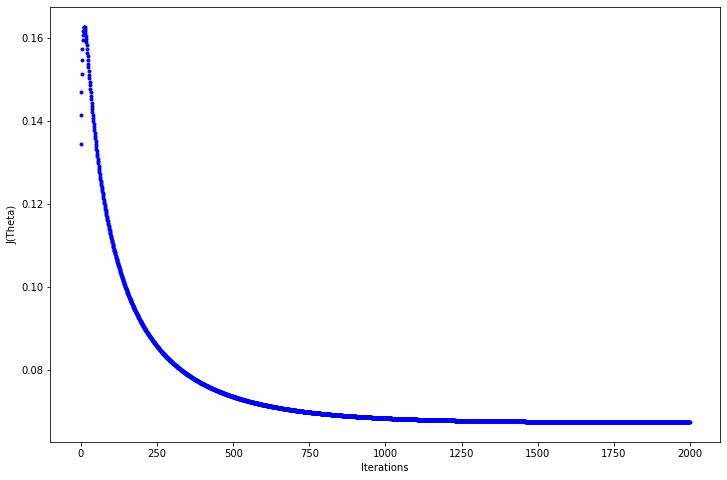

In [111]:
fig,ax = plt.subplots(figsize=(12,8))

# n_iter = 50
# cost_history = new_cost(X_b,y,theta,n_iter)

print(cost_history[-1])

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

# **4. Plot the training accuracy [3pt]**

- plot the training accuracy at every iteration of gradient descent until convergence (in red color)
- the score will be given depending on the accuracy

# **5. Write down the final training accuracy [5pt]**

- present the final training accuracy in number (%) at convergence
- the score will be given depending on the accuracy

In [112]:
%pylab inline 
# 패키지를 로딩한다. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [0]:
def plotData(X, y): 
  # 아래와 같이 사용하지 않는다.
  # pos = (y == 1) 
  # neg = (y == 0) 
  pos = nonzero(y == 1) 
  # Admitted 
  neg = nonzero(y == 0) 
  plt.plot(X[pos, 0], X[pos, 1], 'k+', label='Admitted')
  plt.plot(X[neg, 0], X[neg, 1], 'ko', color='y', label='Not admitted') 
  # plotData(X, y) plt.xlabel('Exam 1 score') 
  # plt.ylabel('Exam 2 score')
  # plt.legend(('Admitted', 'Not admitted'), loc='upper right')

In [114]:
def sigmoid(z): 
  """ 큰 양의 값에 대해서는 결과값이 1에 가깝고, 큰 음수의 값에 대해서는 0에 가깝다. simoid(0) = 0.5 """ 
  g = 1 / (1 + np.exp(-z)) 
  
  return g 
  
print('sigmoid(10) = %s, sigmoid(-10) = %s, sigmoid(0) = %s' % (sigmoid(10), sigmoid(-10), sigmoid(0)))

sigmoid(10) = 0.9999546021312976, sigmoid(-10) = 4.5397868702434395e-05, sigmoid(0) = 0.5


In [122]:
def mapFeature(X1, X2): 
  """ 주어진 데이터를 다항식 항목의 feature로 갯수를 늘려준다. """ 
  degree =  4
  #print(X1.shape) 
  m = np.size(X1) 
  out = np.ones(m) # 1로 채워진 절편 컬럼 벡터 
  # XXX: 벡터 단위로 계산된 내용을 list에 추가하는 방식이 편하다. 
  # 계산된 컬럼 벡터를 list에 추가한다. 
  # res = [[1,1,1,], [2,2,2,], [3,3,3,]] 
  res = [] 
  
  res.append(out) 
  
  for i in np.arange(1, degree + 1): 
    for j in np.arange(0, i + 1): 
      # *************************************************************** 
      # XXX: 아래와 같은 수식은 어떻게 만드는걸까? 
      # *************************************************************** 
      
      out1 = (X1 ** (i - j)) * (X2 ** j) 
      res.append(out1) 
      # list에 저장된 것을 2차원 array 벡터로 변환하고 전치 시켜서 반환한다. 
      
  return np.array(res).T 

data = matrix(data)

X = data[:, 0:2] 
y = data[:, 2] 

X = np.array(X)
y = np.array(y)
      
# X_reg: 118 x 28 dimension, 절편이 포함되어 있다. 
X_reg = mapFeature(X[:, 0], X[:, 1]) 
print(X_reg[0:2, :])

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01  2.62830529e-03
   3.58643425e-02  4.89384194e-01  1.34745327e-04  1.83865725e-03
   2.50892595e-02  3.42353606e-01  6.90798869e-06  9.42624411e-05
   1.28625106e-03  1.75514423e-02  2.39496889e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01  8.60107856e-03
  -6.35227055e-02  4.69142804e-01 -7.97681228e-04  5.89122275e-03
  -4.35092419e-02  3.21334672e-01  7.39785525e-05 -5.46363780e-04
   4.03513411e-03 -2.98012201e-02  2.20094970e-01]]


In [0]:
# np.zeros((n + 1, 1)) 
# initial_theta: 28 x 1 
initial_theta = np.zeros((X_reg.shape[1], 1)) 
# regularization 파라미터 lambda를 1로 설정한다. 
# lambda 는 python 키워드이기 때문에 변수명을 s_lambda로 사용한다. 
s_lambda = 1 
# regularized logistic regression 에 대한 초기 cost 와 gradient 를 구한다. 

def costFunctionReg(theta, X, y, s_lambda): 
  #m = np.size(y) 
  #n = np.size(theta) 
  X = matrix(X) 
  # 출력될 값을 미리 선언한다. 
  J = 0 
  grad = np.zeros(np.size(theta)) 
  m, n = X.shape 
  y = y.reshape((m, 1)) 
  theta = theta.reshape((n, 1)) 
  
  # 1) cost J(theta) 값을 구한다. 

  theta_0 = theta[0] 
  theta_j = theta[1:] 
  # 최소한 theta는 matrix 처리한다. 
  theta = np.matrix(theta) 
  # theta_j 는 array 타입이다. 따라서 요소 제곱합이 계산된다. 
  sum_theta_square = np.sum(theta_j ** 2) 
  # 예측값에 대한 sigmoid를 구한다. 
  predictions = X * theta 
  sig_term = sigmoid(predictions) 
  # 비용 cost J를 구한다. 
  J = 1/m * sum(np.multiply(-y, log(sig_term)) - np.multiply((1 - y), log(1 - sig_term))) + s_lambda / (2 * m) * sum_theta_square 
  
  # 2) theta 편미분 값을 구한다. 
  # theta_0 에 대한 편미분값을 구한다. 
  errors = (sig_term - y) 
  # 첫번째 컬럼 bias에 대해서 계산 
  delta_0 = 1/m * errors.T * X[:, 0] 
  
  # theta_j 에 대한 편미분값을 구한다. 
  delta = 1/m * errors.T * X[:, 1:] 
  # regularization term 계산 
  regular = s_lambda / m * theta_j 
  delta_j = delta.T + regular 
  grad[0] = delta_0 
  grad[1:] = delta_j.T 
  return J, grad 
  cost, grad = costFunctionReg(initial_theta, X_reg, y, s_lambda) 
  
  print('cost is %s and grad is %s. \n' % (cost, grad)) 
  """ """

In [117]:
# minimize 함수 호출을 사용하기 위해 import 한다. 
import scipy.optimize as op 
# octave 에서는 costFunction 안에서 cost와 gradient를 한꺼번에 계산했다. 
# python 에서는 minimize () 사용을 위해서 cost와 gradient 계산을 분리한다. 

def myCostReg(theta, X, y, s_lambda): 
  """ cost J를 계산한다. """ 
  
  X = matrix(X) 
  # 출력될 값을 미리 선언한다. 
  J = 0 
  grad = np.zeros(np.size(theta)) 
  m, n = X.shape 
  y = y.reshape((m, 1)) 
  theta = theta.reshape((n, 1)) 
  # 1) cost J(theta) 값을 구한다. 
  theta_0 = theta[0] 
  theta_j = theta[1:] 
  # 최소한 theta는 matrix 처리한다. 
  theta = np.matrix(theta) 
  # theta_j 는 array 타입이다. 따라서 요소 제곱합이 계산된다. 
  sum_theta_square = np.sum(theta_j ** 2) 
  # 예측값에 대한 sigmoid를 구한다. 
  predictions = X * theta 
  sig_term = sigmoid(predictions)
  # 비용 cost J를 구한다. 
  J = 1/m * sum(np.multiply(-y, log(sig_term)) - np.multiply((1 - y), log(1 - sig_term))) + s_lambda / (2 * m) * sum_theta_square 
  
  return J 
  
def myGradientReg(theta, X, y, s_lambda): 
  """ gradient를 계산한다. """ 
  #m = np.size(y) 
  #n = np.size(theta) 
  X = matrix(X) 
  # 출력될 값을 미리 선언한다. 
  J = 0 
  grad = np.zeros(np.size(theta)) 
  m, n = X.shape 
  y = y.reshape((m, 1)) 
  theta = theta.reshape((n, 1)) 
  # 1) cost J(theta) 값을 구한다. 
  theta_0 = theta[0] 
  theta_j = theta[1:] 
  # 최소한 theta는 matrix 처리한다. 
  theta = np.matrix(theta) 
  # 예측값에 대한 sigmoid를 구한다. 
  predictions = X * theta 
  sig_term = sigmoid(predictions) 
  # 2) theta 편미분 값을 구한다. 
  # theta_0 에 대한 편미분값을 구한다. 
  errors = (sig_term - y) 
  # 첫번째 컬럼 bias에 대해서 계산 
  delta_0 = 1/m * errors.T * X[:, 0] 
  # theta_j 에 대한 편미분값을 구한다. 
  delta = 1/m * errors.T * X[:, 1:]
  # regularization term 계산 
  regular = s_lambda / m * theta_j 
  delta_j = delta.T + regular 
  grad[0] = delta_0 
  grad[1:] = delta_j.T 
   
  return grad.flatten() 
   
initial_theta = np.zeros((X_reg.shape[1], 1)) 
s_lambda = 1 
#s_lambda = 0 
Result = op.minimize(fun = myCostReg, x0 = initial_theta, args = (X_reg, y, s_lambda), method = 'TNC', jac = myGradientReg); 
cost = Result.fun 
theta = Result.x 

theta[0] = 3.4205977944473176
theta[1] = 2.3572564045403275
theta[2] = 3.7835291834255833
theta[3] = -5.842598895522614
theta[4] = -4.389241785733621
theta[5] = -5.207070342216284
theta[6] = 0.4563798174835482
theta[7] = -1.6251832381321931
theta[8] = -1.005748682921645
theta[9] = -1.0599528367068074
theta[10] = -5.19805569239664
theta[11] = 0.2908245870895519
theta[12] = -2.1562304604835396
theta[13] = -1.7191934771447486
theta[14] = -4.36393275892259
   
print('Cost at theta found by fminunc: %s. \n' % cost) 
print('theta: %s. \n' % theta)

Cost at theta found by fminunc: 0.5436373294073025. 

theta: [ 1.28775612  0.56747242  1.11842249 -2.20672757 -0.92832318 -1.6252177
 -0.03664128 -0.36909355 -0.33634635 -0.47660816 -1.67872046 -0.05978776
 -0.62663107 -0.26311978 -1.5485849 ]. 



In [0]:
def predict(theta, X): 
  """ 파라미터 theta와 X 에 의한 결과값을 예측한다. """ 
  m = matrix(X) 
  m, n = X.shape 
  theta = theta.reshape((n, 1)) 
  theta = matrix(theta) 
  p = np.zeros((m, 1)) 
  p = sigmoid(X * theta) >= 0.5; 
  
  return p 

In [123]:
p = predict(theta, X_reg) 
print(y)
print('Train Accuracy: %s' % np.mean(double(p == y)))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Train Accuracy: 0.8220338983050848


# **6. Plot the optimal classifier superimposed on the training data [5pt]**

- plot the boundary of the optimal classifier at convergence (in green color)
- the boundary of the classifier is defined by {(x,y)∣σ(g(x,y;θ))=0.5}={(x,y)∣g(x,y;θ)=0}
- plot the training data points (x,y) with their labels lll in colors superimposed on the illustration of the classifier (blue for label 0 and red for label 1)
- you can use contour function in python3
- the score will be given depending on the accuracy

In [0]:
def plotDecisionBoundary(theta, X, y): 
  
  if np.size(X, 1) <= 3: 
    plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1] + 2)]) 
    plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0]) 
    plot(plot_x, plot_y) 
    plt.legend(('Admitted', 'Not admitted'), loc='upper right') 
  
  else: 

    u = linspace(-1, 1.5, 50) 
    v = linspace(-1, 1.5, 50) 
    z = np.zeros((np.size(u), np.size(v))) 

    for i in np.arange(np.size(u)): 
      for j in np.arange(np.size(v)): 
        z[i, j] = np.sum(mapFeature(u[i], v[j]) * theta) 
        
        z = z.T 

    plt.figure()
    plt.scatter(pointX0, pointY0, c='b')
    plt.scatter(pointX1, pointY1, c='r')
    plt.tight_layout()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.contour(u, v, z) 

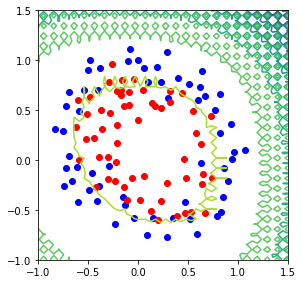

In [121]:
# 경계선을 그린다. 
plotDecisionBoundary(theta, X_reg, y)